<a href="https://colab.research.google.com/github/c-daly/Notebooks/blob/main/EntropyCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is a educational project to better understand entropy and decision trees as described in Chapter 14 of Norvig and Russel's AIMA. 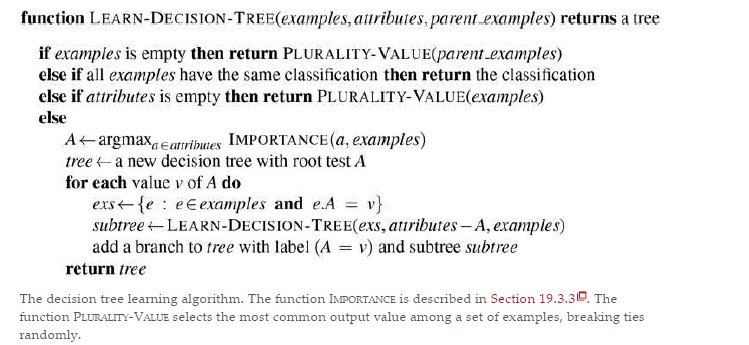 

An issue I'm having implementing this algorithm is that it's meant to return a tree, but the halt cases do not appear to return a tree.

Import Numpy and Pandas and initialize data.

In [2]:
import numpy as np
import pandas as pd

label_column = 'willwait'

example1 = {'alt': 'yes', 'bar': 'no', 'frisat': 'no', 'hungry': 'yes', 'patrons': 'some', 'price': '3', 'rain': 'no', 'res': 'yes', 'type': 'french', 'wait': '10', 'willwait': 'yes'  }
example2 = {'alt': 'yes', 'bar': 'no', 'frisat': 'no', 'hungry': 'yes', 'patrons': 'full', 'price': '1', 'rain': 'no', 'res': 'no', 'type': 'thai', 'wait': '60', 'willwait': 'no'  }
example3 = {'alt': 'no', 'bar': 'yes', 'frisat': 'no', 'hungry': 'no', 'patrons': 'some', 'price': '1', 'rain': 'no', 'res': 'no', 'type': 'burger', 'wait': '10', 'willwait': 'yes'  }
example4 = {'alt': 'yes', 'bar': 'no', 'frisat': 'yes', 'hungry': 'yes', 'patrons': 'full', 'price': '1', 'rain': 'yes', 'res': 'no', 'type': 'thai', 'wait': '30', 'willwait': 'yes'  }
example5 = {'alt': 'yes', 'bar': 'no', 'frisat': 'yes', 'hungry': 'no', 'patrons': 'full', 'price': '3', 'rain': 'no', 'res': 'yes', 'type': 'french', 'wait': '61', 'willwait': 'no'  }
example6 = {'alt': 'no', 'bar': 'yes', 'frisat': 'no', 'hungry': 'yes', 'patrons': 'some', 'price': '2', 'rain': 'yes', 'res': 'yes', 'type': 'italian', 'wait': '10', 'willwait': 'yes'  }
example7 = {'alt': 'no', 'bar': 'yes', 'frisat': 'no', 'hungry': 'no', 'patrons': 'none', 'price': '1', 'rain': 'yes', 'res': 'no', 'type': 'burger', 'wait': '10', 'willwait': 'no'  }
example8 = {'alt': 'no', 'bar': 'no', 'frisat': 'no', 'hungry': 'yes', 'patrons': 'some', 'price': '2', 'rain': 'yes', 'res': 'yes', 'type': 'thai', 'wait': '10', 'willwait': 'yes'  }
example9 = {'alt': 'no', 'bar': 'yes', 'frisat': 'yes', 'hungry': 'no', 'patrons': 'full', 'price': '1', 'rain': 'yes', 'res': 'no', 'type': 'burger', 'wait': '61', 'willwait': 'no'  }
example10 = {'alt': 'yes', 'bar': 'yes', 'frisat': 'yes', 'hungry': 'yes', 'patrons': 'full', 'price': '3', 'rain': 'no', 'res': 'yes', 'type': 'italian', 'wait': '30', 'willwait': 'no' }
example11 = {'alt': 'no', 'bar': 'no', 'frisat': 'no', 'hungry': 'no', 'patrons': 'none', 'price': '1', 'rain': 'no', 'res': 'no', 'type': 'thai', 'wait': '10', 'willwait': 'no'  }
example12 = {'alt': 'yes', 'bar': 'yes', 'frisat': 'yes', 'hungry': 'yes', 'patrons': 'full', 'price': '1', 'rain': 'no', 'res': 'no', 'type': 'burger', 'wait': '60', 'willwait': 'yes' }

data = [
  example1, example2, example3, example4, example5, example6, example7, example8, example9, example10, example11, example12
] 

df = pd.DataFrame.from_records(data)


Quick and dirty node definition for the decision tree nodes.

In [3]:
class Node:
  def __init__(self, attribute):
    #self.parent = parent
    self.children = {}
    self.attribute = attribute

In [ ]:
class DecisionTree:
  def __init__(self):
    self.root = None


All the supporting methods

In [4]:
def allExamplesHaveSameClassification(examples):
   return len(set(examples[label_column])) == 1


def getPluralityValue(examples):
  num_positives = len(getPositiveValues(examples))

  if num_positives > len(examples) - num_positives:
    return 'yes'
  else:
    return 'no'

def getPositiveValues(examples):
  positive_examples = examples[examples[label_column] == 'yes']
  return positive_examples

def getNumPositiveExamplesByAttributeValue(examples, attribute, value):
  positive_examples = examples[(examples[attribute] == value) & (examples[label_column] == 'yes')]
  return len(positive_examples)

def B(prob):
  if prob == 0:
    result = 0
  else:
    firstLogResult = 0
    secondLogResult = 0
    if prob > 0:
      firstLogResult = np.log2(prob)
    if prob < 1:
      secondLogResult = np.log2(1-prob)
    result = -(prob * firstLogResult + (1-prob) * secondLogResult)
  return result

def remainder(examples, attribute, values):
  remainder = 0
  total_count = len(examples)
  total_positive = len(examples[examples[label_column] == 'yes'])
  value_positive_count = 0
  value_negative_count = 0
  for value in values:
    value_count = len(df[df[attribute] == value])
    value_positive_count = getNumPositiveExamplesByAttributeValue(examples, attribute, value)
    temp = (value_count/total_count) * B(value_positive_count/value_count)
    remainder += temp

  return remainder

def calculateEntropy(examples, feature, values):

  probabilities = []

  for value in values:
    num_positives = getNumPositiveExamplesByAttributeValue(examples, feature, value)
    num_negatives = len(examples) - num_positives

  prob_positive = num_positives / len(examples)
  entropy = -(prob_positive * np.log2(prob_positive))
  return entropy

def calculateGainForAttribute(examples, attribute, values):
  total_count = len(examples)
  total_positive = len(getPositiveValues(examples))

  b = B(total_positive/total_count)
  result = b - remainder(examples, attribute, values) 
  #print(f"{attribute} gain: {result}")
  return result

def getAttributeValuesFromExamples(examples, attribute):
  if len(examples) == 0:
    return None
  else:
    return examples[attribute].unique()

def getMostImportantAttribute(examples, features):
  gain =-99 
  best_attribute = None
  for attribute in features:
    if attribute == label_column:
      if len(features) == 1:
        return
      continue
    temp_gain = calculateGainForAttribute(examples, attribute, getAttributeValuesFromExamples(examples, attribute))
    if temp_gain > gain:
      gain = temp_gain
      best_attribute = attribute
  #print(f"Attribute/gain: {best_attribute}/{gain}")
  return best_attribute


learnDecisionTree is the driver method and this cell contains the method definition as well as its invocation.

In [10]:
def learnTree(features, examples, parent_examples):
  #print(f"In Create Tree. examples {examples}")
  if examples is None: 
     #print(f"no examples: {parent_examples[label_column].mode()[0]}")
     return Node(parent_examples['willwait'].mode()[0])
  if allExamplesHaveSameClassification(examples):
    #print(f"same classification returns: {examples[label_column].mode()[0]}")
    return Node(examples[label_column].mode()[0])
  attribute = getMostImportantAttribute(examples, features)
  #print(f"{attribute} chosen to split on")
  if attribute is None:
     #print(f"no attributes: {examples[label_column].mode()[0]}")
     return Node(examples['willwait'].mode()[0])
  node = Node(attribute)
  #print(f"Node created for {attribute}")
  values = getAttributeValuesFromExamples(examples, attribute)

  #print(f"attribute, Features: {attribute},{features}")
  for value in values:
    #print(f"Value: {value}")
    value_examples = examples[examples[attribute] == value]
    #print(value_examples)
    temp = value_examples.drop([attribute], axis=1)
    #print(temp)
    new_features = temp.columns
    #print(f"Creating child node for {attribute}")
    node.children[value] = learnTree(new_features, temp, examples)
  return node

def printNode(node):
  #print(f"Attribute: {node.attribute}")
  #print(f"Children: {node.children}")
  if not node.children:
    return
  print(node.attribute)
  for value in node.children:
    printNode(node.children[value])
   
dt = learnTree(df.columns, df, None)
children = dt.children
parent = dt
printNode(dt)

patrons
wait
type
type
